In [1]:
!pip install nltk scikit-learn matplotlib seaborn pandas

Dataset size: 80
                                 review sentiment
0         Five stars, will order again.  positive
1  The product is excellent, I love it!  positive
2    Fast delivery and great packaging.  positive
3             Exceeded my expectations!  positive
4    Legit product, highly recommended!  positive

Training samples: 64
Testing samples: 16

=== METRICS ===
Accuracy: 0.875
Precision: 0.8
Recall: 1.0
F1 Score: 0.8888888888888888

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

    negative       1.00      0.75      0.86         8
    positive       0.80      1.00      0.89         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


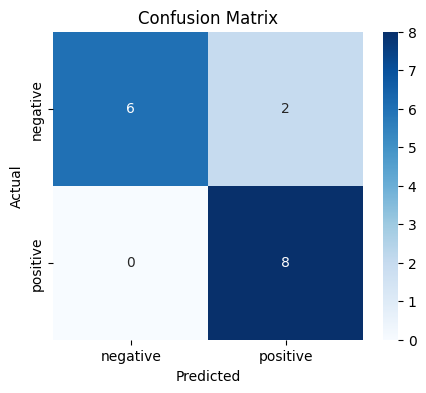


TRY IT! Enter a sample review below.
Enter your review: The product was horrible and it broke within a day

Predicted Sentiment: NEGATIVE


In [3]:
# ================================
# INSTALL LIBRARIES
# ================================
# pip install nltk scikit-learn matplotlib seaborn pandas --quiet

#     nltk → text processing, tokenization
#     scikit-learn → machine learning
#     pandas → for structured datasets
#     matplotlib / seaborn → for charts and visualization

import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# CREATE SAMPLE DATASET (100 SHOPPING WEBSITE REVIEWS)
# ================================

positive_reviews = [
    "The product is excellent, I love it!",
    "Very good quality, worth every peso.",
    "Fast delivery and great packaging.",
    "Item arrived in perfect condition.",
    "Super satisfied with this purchase.",
    "Amazing product! Works perfectly.",
    "Highly recommended seller!",
    "Great value for the price.",
    "The material feels premium.",
    "Exactly as described. Very happy!",
    "Five stars, will order again.",
    "Exceeded my expectations!",
    "The color and design are beautiful.",
    "Very useful and durable.",
    "Everything works as advertised.",
    "Good quality for the price.",
    "Seller is responsive and kind.",
    "Smooth transaction. Thanks!",
    "Legit product, highly recommended!",
    "My favorite purchase this month.",
]

negative_reviews = [
    "Terrible quality, not worth the money.",
    "Very disappointed. Stopped working after one day.",
    "Item arrived damaged and unusable.",
    "The product feels very cheap.",
    "Not what I expected at all.",
    "Shipping took too long.",
    "The item is defective.",
    "Completely useless, waste of money.",
    "Wrong item was delivered.",
    "Poor quality materials used.",
    "The product did not match the description.",
    "Customer service was unhelpful.",
    "Battery drains too fast.",
    "Arrived with scratches and dents.",
    "I regret buying this product.",
    "It broke after a few uses.",
    "Size is incorrect. Doesn't fit.",
    "Very low quality, would not recommend.",
    "Not durable. Quickly damaged.",
    "Disappointed. Expected better."
]

# Duplicate data to create 100 reviews (50 positive, 50 negative)
df = pd.DataFrame({
    "review": positive_reviews * 2 + negative_reviews * 2,
    "sentiment": ["positive"] * 40 + ["negative"] * 40
})

df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle dataset
print("Dataset size:", len(df))
print(df.head())

# ===============================================================
# TRAIN–TEST SPLIT (80–20)
# ===============================================================

X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))

# | Term    | Meaning    |
# |---------|------------|
# | X    | the text reviews    |
# | y    | the labels (positive/negative)    |
# | test_size=0.20  | 20% of the data for testing    |
# | stratify=y   | keeps equal balance of positive/negative in both train and test    |

# ===============================================================
# TF–IDF FEATURE EXTRACTION
# ===============================================================

vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Machine learning models cannot read text.
# So we convert words → numerical features.
# TF–IDF means:
# • TF = Term Frequency
# • IDF = Inverse Document Frequency
# Creates a weighted representation of words.

# ===============================================================
# TRAIN MODEL
# ===============================================================

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# ===============================================================
# METRICS
# ===============================================================

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="positive")
recall = recall_score(y_test, y_pred, pos_label="positive")
f1 = f1_score(y_test, y_pred, pos_label="positive")

# - **Accuracy** → overall correctness
# - **Precision** → how many predicted positives are truly positive
# - **Recall** → how many actual positives were detected
# - **F1 Score** → balance of precision & recall

# Then the classification report shows:
# - support
# - precision
# - recall
# - f1 score

print("\n=== METRICS ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# ===============================================================
# CONFUSION MATRIX
# ===============================================================

cm = confusion_matrix(y_test, y_pred)

# |                     | Predicted Positive | Predicted Negative |
# |---------------------|-------------------|-------------------|
# | Actual Positive     | True Positive     | False Negative    |
# | Actual Negative     | False Positive    | True Negative     |

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================================================
# PREDICTION FUNCTION
# ===============================================================

def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    prediction = model.predict(review_tfidf)[0]
    return prediction

print("\n================================")
print("TRY IT! Enter a sample review below.")
print("================================")

user_review = input("Enter your review: ")
result = predict_sentiment(user_review)

print("\nPredicted Sentiment:", result.upper())